Sentiment Analysis

In [1]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import nltk
from nltk.corpus import stopwords # Import the stop word list

Functions

In [2]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

tweets_data_path = 'twitter_data_1.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

Print number of tweets

In [3]:
print len(tweets_data)

269


Structure the tweets data into a pandas DataFrame to simplify the data manipulation.

In [4]:
tweets = pd.DataFrame()

Add 1 column to the tweets DataFrame called text, where text column contains the tweet,

In [5]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

Read first tweet.

In [6]:
print tweets['text'][0]

@ahmadhisan dataran senawang. Menghadap Maybank carilah Pot Meatballs. Dia buka malam pukul 7


Remove punctuation and numbers

In [7]:
print stopwords.words("english") 

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

Create CSV file

In [14]:
# Open/create a file to append data to
csvFile = open('tweet.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweets['text']:
    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.encode('utf-8')])
    #print tweet.encode('utf-8')
    #print "\n"
csvFile.close()

Show top 5 languages in which the tweets were written.

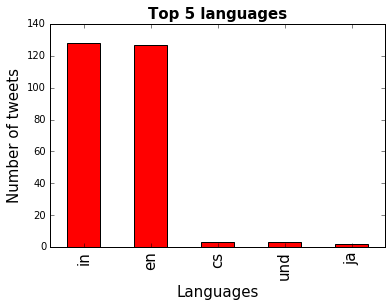

In [9]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

Show top 5 countries from which the tweets were sent.

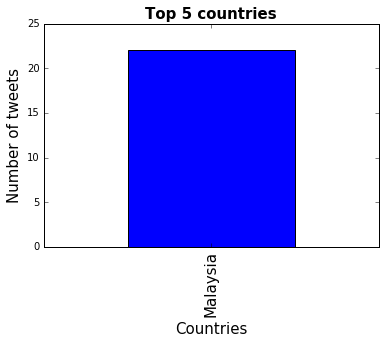

In [10]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

Add 3 columns to our tweets DataFrame.

In [11]:
tweets['maybank'] = tweets['text'].apply(lambda tweet: word_in_text('maybank', tweet))
tweets['cimb'] = tweets['text'].apply(lambda tweet: word_in_text('cimb', tweet))
tweets['hong leong'] = tweets['text'].apply(lambda tweet: word_in_text('hong leong', tweet))

Calculate the number of tweets for each programming language as follows:

In [12]:
print tweets['maybank'].value_counts()[True]
print tweets['cimb'].value_counts()[True]
print tweets['hong leong'].value_counts()[True]

84
83
6


Make a simple comparaison chart by executing the following:

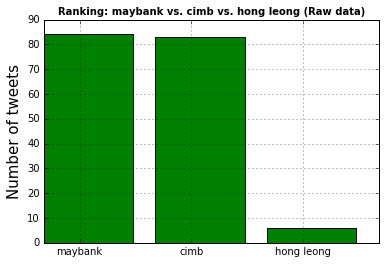

In [13]:
prg_langs = ['maybank', 'cimb', 'hong leong']
tweets_by_prg_lang = [tweets['maybank'].value_counts()[True], tweets['cimb'].value_counts()[True], tweets['hong leong'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: maybank vs. cimb vs. hong leong (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()